In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls
import os
import yaml
from yaml import Loader
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import copy
from utils_graphs import create_graph, plot_graph, get_colors, fig_graph_degrees
import matplotlib.colors as cm
from matplotlib.lines import Line2D

In [2]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database()

In [3]:
# chosen areas for the analysis
areas = ['MOB', 'AOB', 'COA', 'PAA', 'PA', 'MEA', 'BST', 'PD', 'PVp', 'MPN', 'PMv', 'ARH']

In [4]:
def create_df(dictionary, area_acronyms):
    """
    Create a DataFrame summarizing cell counts across experimental groups.

    This function divides subjects into experimental groups, calculates cell counts
    for each group, and formats the results into a single DataFrame.

    Parameters:
    dictionary (dict): Dictionary containing results across mice.
    area_acronyms: chosen areas in acronym notation

    Returns:
    pd.DataFrame: DataFrame containing area, cell counts, group, and subject information.
    """
    # Divide subjects into experimental groups
    experimental_groups = utils.divide_in_exp_groups(list_subjects=dictionary.keys())

    # Calculate cell counts across groups
    df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = ace.calculate_value_across_groups(
        experimental_groups=experimental_groups,
        dict_results_across_mice=dictionary,
        value='n_cells'
    )

    # Define areas and their acronyms
    list_areas = [volumes.loc[volumes['acronym'] == ac]['safe_name'].values[0] for ac in areas]
    columns = ['area', 'cells', 'group', 'subject']

    # Initialize DataFrames for control, familiar, and unfamiliar groups
    control = pd.DataFrame(columns=columns)
    fam = pd.DataFrame(columns=columns)
    unfam = pd.DataFrame(columns=columns)

    # Populate DataFrames for each group with area, subject, group, and cell count information
    for group, df, df_count in zip(
            list(experimental_groups.keys()),
            [control, fam, unfam],
            [df_control_cell_count, df_fam_cell_count, df_unfam_cell_count]):

        df['area'] = [area for area in area_acronyms for sub in experimental_groups[group]]
        df['subject'] = [sub for area in area_acronyms for sub in experimental_groups[group]]
        df['group'] = [group for area in area_acronyms for sub in experimental_groups[group]]
        df['cells'] = [df_count.set_index('area').loc[area][sub]
                       for area in list_areas for sub in experimental_groups[group]]

    # Combine DataFrames for all groups into a single DataFrame
    df = control.append(fam).append(unfam)

    return df

# BLACK

## WITH FATHER

In [5]:
dict_c57_wf = np.load('dict_results/newvolumes/dict_results_across_mice_c57_merged_hemispheres_F6BL48.npy', 
                      allow_pickle=True).item()

dict_c57_wf = upls.reformat_dict_acronym(dict_results=dict_c57_wf, volumes=volumes)

c57_wf = create_df(dictionary=dict_c57_wf, area_acronyms=areas)

<ipython-input-6-bbae06b0245f>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


(0.6114214538961331, 100000)

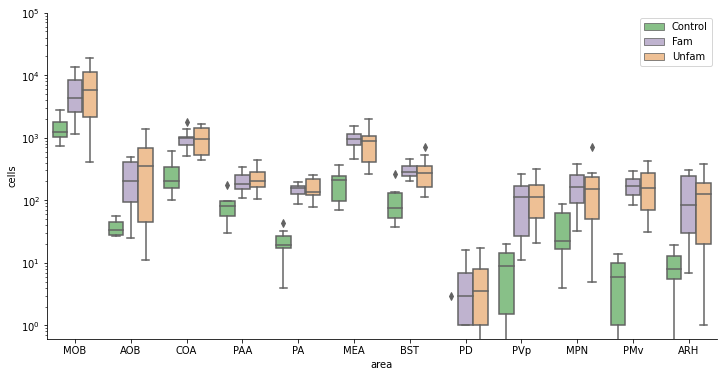

In [6]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.boxplot(
    data=c57_wf,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)

<ipython-input-7-224d8f3b0a26>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


(2.6212211548449322, 100000)

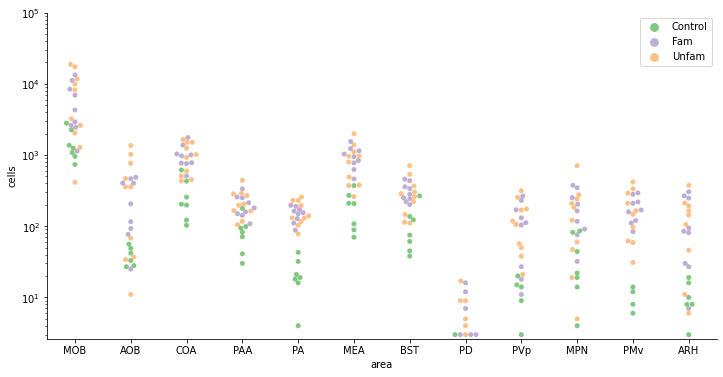

In [7]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.swarmplot(
    data=c57_wf,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)

## WITHOUT FATHER

In [8]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_BL_woF2000.npy', allow_pickle=True).item()
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, volumes=volumes)

c57_wof = create_df(dictionary=dict_results_across_mice, area_acronyms=areas)

<ipython-input-9-76147efe67ef>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


(0.6502150385587008, 100000)

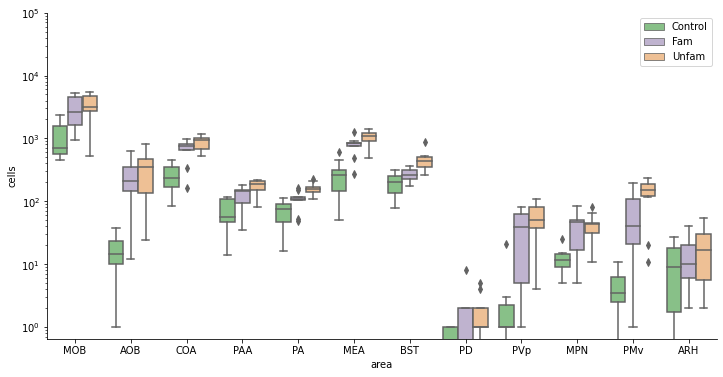

In [9]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.boxplot(
    data=c57_wof,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)

/home/stella/anaconda2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-10-90a8acb98bfa>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


(0.6502150385587008, 100000)

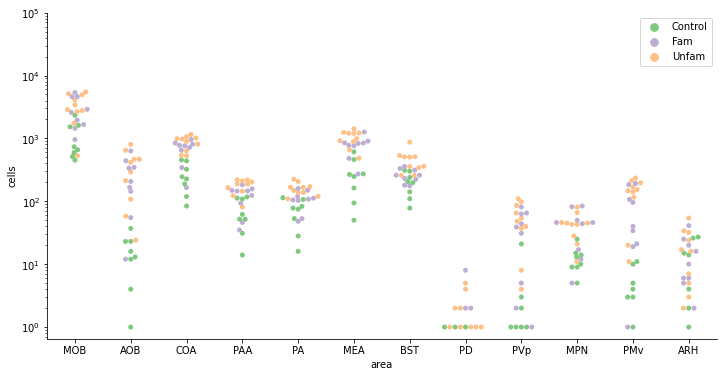

In [10]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.swarmplot(
    data=c57_wof,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)

# WILD

## WITH FATHER

In [11]:
dict_wild_wf = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy', 
                                   allow_pickle=True).item()

dict_wild_wf = upls.reformat_dict_acronym(dict_results=dict_wild_wf, 
                                                      volumes=volumes)

wild_wf = create_df(dictionary=dict_wild_wf, area_acronyms=areas)

<ipython-input-12-6ff8be06f671>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


(0.15356248248122353, 100000)

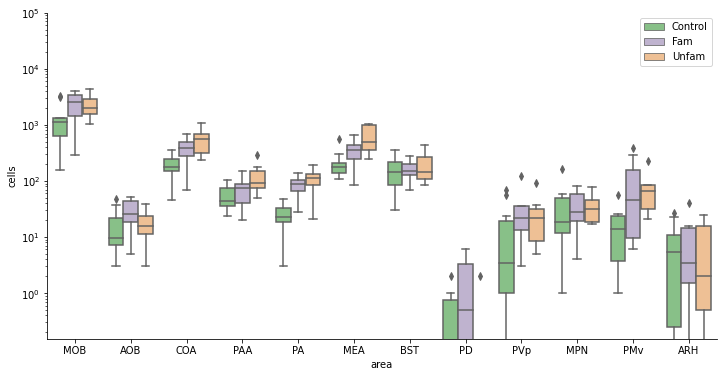

In [12]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.boxplot(
    data=wild_wf,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)

/home/stella/anaconda2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-13-eae148ff1977>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


(0.6583367742582793, 100000)

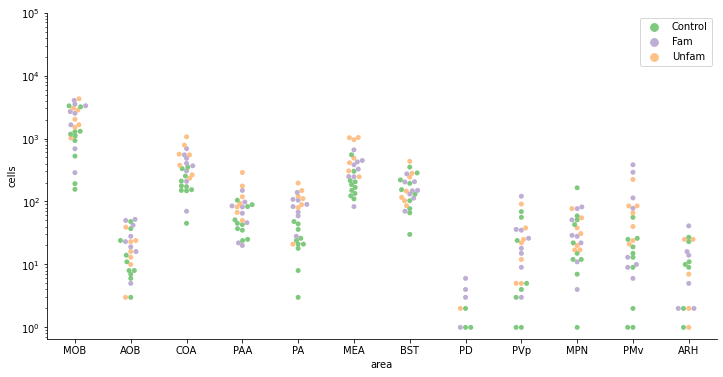

In [13]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.swarmplot(
    data=wild_wf,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)

## WITHOUT FATHER

In [14]:
dict_wild_wof = np.load('dict_results/dict_results_across_mice_WILD_without_father2500.npy', 
                        allow_pickle=True).item()

dict_wild_wof = upls.reformat_dict_acronym(dict_results=dict_wild_wof, 
                                           volumes=volumes)

wild_wof = create_df(dictionary=dict_wild_wof, area_acronyms=areas)

<ipython-input-15-093d5e1353a6>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


(0.14764618767777396, 100000)

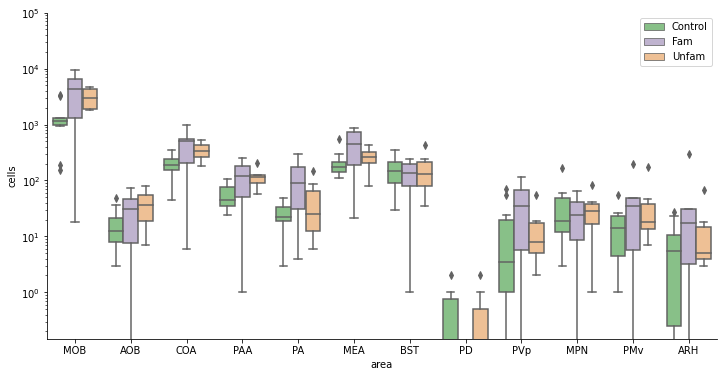

In [15]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.boxplot(
    data=wild_wof,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)

/home/stella/anaconda2/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-16-ed0c6247c763>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,100000)


(0.6329730631907647, 100000)

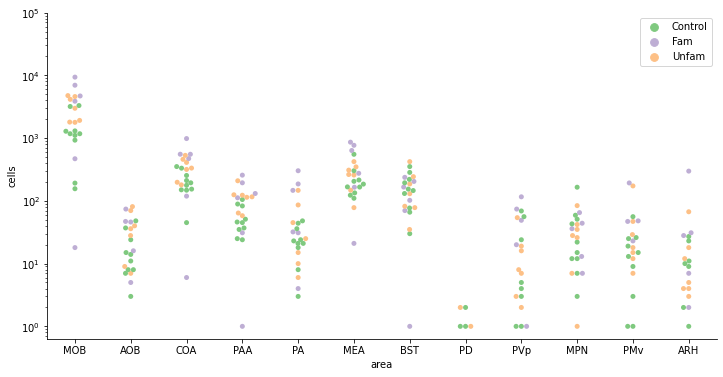

In [16]:
f, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.set_yscale("log")
sns.swarmplot(
    data=wild_wof,
    x="area", y="cells", hue="group", palette="Accent", ax=ax)
sns.despine(ax=ax, right=True)
#remove one of the legend
ax.legend_.set_title("")
ax.set_ylim(0,100000)